<a href="https://colab.research.google.com/github/H5Y0UNG/20_group/blob/main/10%EC%A3%BC%EC%B0%A8_%EC%A0%95%EB%A6%AC%EB%85%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설정

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# PCA
3D 데이터셋을 만듭니다:

In [ ]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

## 주성분

$X = U \sum V^T$ 에서 $V$가 주성분

* (m, m) (m, n) (n, n)

m: 샘플 개수, n: 특성 개수

#(SVD를 사용할 때)

X_centered = X - X.mean(axis=0)

X에서 X의 평균만큼 전부 뺀후

U, s, Vt = np.linalg.svd(X_centered)

svd함수를 이용해서 주성분값인 Vt를 생성하게 된다.



In [ ]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

#주성분 c1, c2 확인

In [ ]:
c1

array([0.93636116, 0.29854881, 0.18465208])

In [ ]:
c2

array([-0.34027485,  0.90119108,  0.2684542 ])

In [ ]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [ ]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [ ]:
X_centered

array([[-1.03976771e+00, -7.60238460e-01, -3.32880482e-01],
       [-3.17841939e-02,  3.90260570e-01, -3.64766659e-02],
       [-9.77238797e-01, -6.73862060e-01, -3.20757101e-01],
       [-9.44190485e-01,  7.70779228e-04, -4.97304144e-02],
       [-7.87164831e-01, -5.10641487e-02,  1.19970744e-01],
       [ 1.09409378e+00,  1.15762056e-01,  2.45551498e-01],
       [-1.04665623e+00, -8.53165791e-01, -2.05241169e-01],
       [ 6.49452398e-01, -4.82750342e-01, -7.94325731e-02],
       [ 9.92128132e-01,  3.06140931e-01,  3.96278747e-01],
       [ 5.25509785e-01,  4.67955007e-01,  1.62461684e-01],
       [-1.01367188e+00, -2.00458976e-01, -1.93074561e-01],
       [ 1.10841362e+00,  7.29745189e-02, -1.82449496e-03],
       [-1.01744457e+00, -4.77653389e-01, -2.29165228e-01],
       [-9.71704237e-01, -7.08910047e-01, -2.10833327e-01],
       [ 1.07688965e+00, -3.86770525e-02,  2.63501050e-02],
       [-3.70113351e-01,  2.44018985e-01, -7.21578839e-03],
       [ 6.66958762e-01, -4.82702763e-01

In [ ]:
Vt.T[:, :2]

array([[ 0.93636116, -0.34027485],
       [ 0.29854881,  0.90119108],
       [ 0.18465208,  0.2684542 ]])

## d 차원으로 투영하기

2개의 특성만 이용한다면 W2 = Vt.T[:, :2]

훈련세트를 2차원으로 투영하기 위해 점곱 dot 사용

X2D = X_centered.dot(W2)

In [ ]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [ ]:
X2D_using_svd = X2D

# (사이킷런의 PCA 모델을 사용할 때)

pca = PCA(n_components=2) 2차원 사용

X2D = pca.fit_transform(X)

모델 적용 및 전환


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
#X2D = pca.fit_transform(X_centered)

두 결과값 X2D가 서로 부호가 반대가 되어 축이 바뀐다는 것을 알 수 있다.

In [ ]:
X2D[:2]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239]])

In [ ]:
X2D_using_svd[:2]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239]])

또한 SVD의 Vt.T[:2]와 pca.components_의 값이 부호와 행렬이 반대로 되어 있어

그 이후 X2D가 반대로 된 원인이라는 것을 알 수 있다.

In [ ]:
Vt.T[:3]

array([[ 0.93636116, -0.34027485, -0.08626012],
       [ 0.29854881,  0.90119108, -0.31420255],
       [ 0.18465208,  0.2684542 ,  0.94542898]])

In [ ]:
Vt.T[:2]

array([[ 0.93636116, -0.34027485, -0.08626012],
       [ 0.29854881,  0.90119108, -0.31420255]])

In [ ]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

X와 X_centered의 차이

코드에서 사이킷런 PCA를 사용할 때 SVD와 달리 X_centered 대신 X를 사용하는데 그 이유을 알아보기 위해 값을 찾아본다

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D1 = pca.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D2 = pca.fit_transform(X_centered)

In [ ]:
X[:3,:]

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288]])

In [ ]:
X_centered[:3,:]

array([[-1.03976771, -0.76023846, -0.33288048],
       [-0.03178419,  0.39026057, -0.03647667],
       [-0.9772388 , -0.67386206, -0.3207571 ]])

분명히 위에서 X와 X_centered의 값이 서로 다른데 fit_transform을 거치고 나면 값이 같아진다.

In [ ]:
X2D1[:3,:]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729]])

In [ ]:
X2D2[:3,:]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729]])

#커널 PCA

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

linear, rbf, sigmoid 커널로 kPCA를 적용

그림 저장 kernel_pca_plot


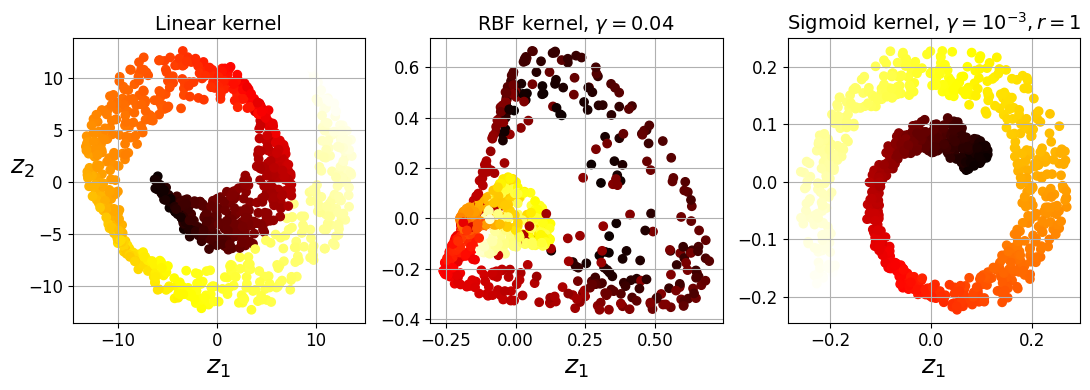

In [ ]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("kernel_pca_plot")
plt.show()

# GridSearchCV를 이용하기

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

최적의 파라미터 값

kpca__gamma는 0.043333333333333335

kpca__kernel는 rbf이다

In [ ]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


#재구성 원상의 오차 이용하기

In [ ]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

X를 2차원의 rbf 커널로 PCA를 사용하여 X_reduced로 축소후에

inverse_transform으로 다시 복구한 후 원래의 X값과 비교하여 얼마의 오차가 있는지 확인한다.

이 때 KernelPCA의 파라미터 fit_inverse_transform=True를 추가해야 재구성을 수행한다.

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576614

#적절한 차원수 선택하기

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

차원을 축소하지 않고 PCA를 계산한 뒤 훈련 세트의 분산을 95%로 유지하는 데 필요한 최소한의 차원
수를 계산

pca.explained_variance_ratio_은 분산의 비율

cumsum으로 누적된 분산을 구한다.

처음으로 누적된 분산이 95%가 넘어갈 때의 주성분 개수를 d에 저장

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [ ]:
len(pca.explained_variance_ratio_)

784

그림 저장 explained_variance_plot


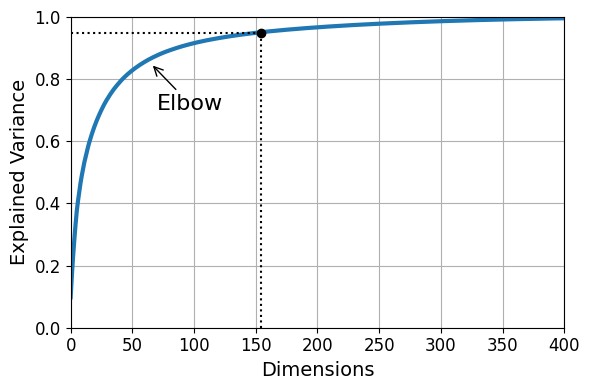

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()


In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
pca.n_components_

154

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9504222547453769

# LLE

In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

그림 저장 lle_unrolling_plot


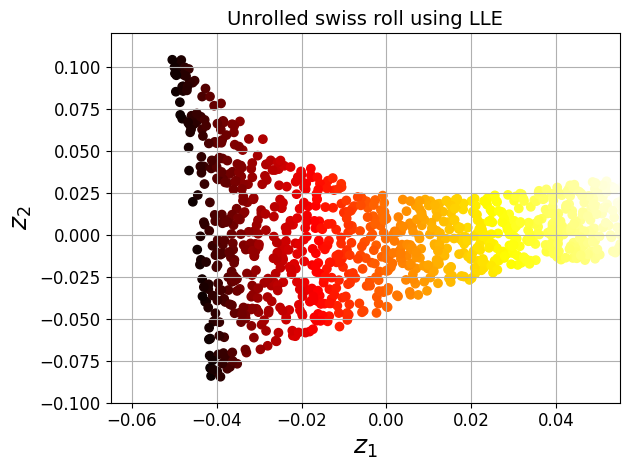

In [ ]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()